<a href="https://colab.research.google.com/github/GaneshiUmayangana/Analysis-of-HASU-HNB-Assurance-PLC-stock-dataset/blob/main/HASU_Dataset_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('HASU Historical Data(2).csv')

In [ ]:
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,6/20/2022,32.2,NaN,NaN,NaN,NaN,NaN
1,6/21/2022,33.0,NaN,NaN,NaN,NaN,NaN
2,6/22/2022,33.0,NaN,NaN,NaN,NaN,NaN
3,6/23/2022,33.0,NaN,NaN,NaN,NaN,NaN
4,6/24/2022,35.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df [['Date','Price']]
df

,Date,Price
0,6/20/2022,32.2
1,6/21/2022,33.0
2,6/22/2022,33.0
3,6/23/2022,33.0
4,6/24/2022,35.0
...,...,...
493,7/8/2024,58.0
494,7/9/2024,57.8
495,7/10/2024,58.0
496,7/11/2024,58.1


In [ ]:
df.isna().sum()

Date     0
Price    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

### Part A

In [ ]:
# Create a time index starting from t=0 for the first row
df['Time_Index'] = np.arange(len(df))
print(df)

          Date  Price  Time_Index
0    6/20/2022   32.2           0
1    6/21/2022   33.0           1
2    6/22/2022   33.0           2
3    6/23/2022   33.0           3
4    6/24/2022   35.0           4
..         ...    ...         ...
493   7/8/2024   58.0         493
494   7/9/2024   57.8         494
495  7/10/2024   58.0         495
496  7/11/2024   58.1         496
497  7/12/2024   58.2         497

[498 rows x 3 columns]


In [ ]:
logx = np.log(df['Price'])

df['log(Price)'] = np.log(df['Price'])


### Part b

In [ ]:
# Calculate log returns and add as a new column
logreturn_t = np.append([0], np.diff(df['log(Price)']))
df['logreturn'] = logreturn_t

In [ ]:
# Save the updated DataFrame to the CSV file
#df.to_csv('HASU Historical Data(2).csv', index=False)

# Display the updated DataFrame
print(df)


          Date  Price  Time_Index  log(Price)  logreturn
0    6/20/2022   32.2           0    3.471966   0.000000
1    6/21/2022   33.0           1    3.496508   0.024541
2    6/22/2022   33.0           2    3.496508   0.000000
3    6/23/2022   33.0           3    3.496508   0.000000
4    6/24/2022   35.0           4    3.555348   0.058841
..         ...    ...         ...         ...        ...
493   7/8/2024   58.0         493    4.060443   0.012142
494   7/9/2024   57.8         494    4.056989  -0.003454
495  7/10/2024   58.0         495    4.060443   0.003454
496  7/11/2024   58.1         496    4.062166   0.001723
497  7/12/2024   58.2         497    4.063885   0.001720

[498 rows x 5 columns]


### Part c

In [ ]:
# Estimate drift (µGB) and scale (σ) parameters
mu_GB = np.mean(logreturn_t)
sigma_GB = np.std(logreturn_t, ddof=1)
Driftparameter= mu_GB+(sigma_GB**2)/2

In [ ]:
print("Mu=",mu_GB)
print("Driftparameter,",Driftparameter)
print("sigma=",sigma_GB)

Mu= 0.0011885921730663248
Driftparameter, 0.0014614030476486743
sigma= 0.023358547668138514


### Part d

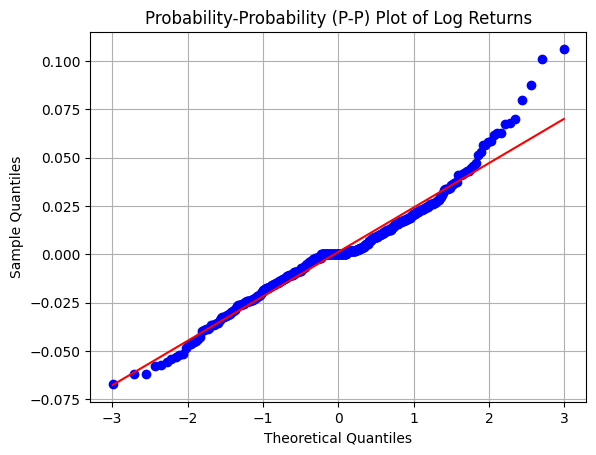

In [ ]:
# Create a P-P plot
probplot(logreturn_t, dist='norm', plot=plt)
plt.title('Probability-Probability (P-P) Plot of Log Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

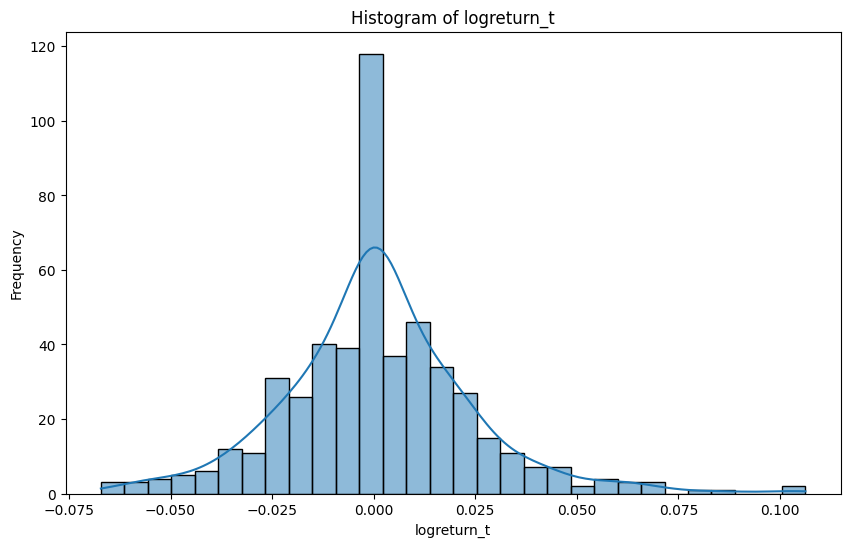

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['logreturn'], bins=30, kde=True)
plt.title('Histogram of logreturn_t')
plt.xlabel('logreturn_t')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from scipy import stats

In [ ]:
# Perform Shapiro-Wilk test
stat, p_value = stats.shapiro(df['logreturn'])

print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic: 0.9633684537953078
p-value: 8.335106189589879e-10
Sample does not look Gaussian (reject H0)


### Part e

In [ ]:
def BrownianG(m, T,N, sigma, mu,w0,GB=False) :
    """
    Arguments
    m-Number of sample paths
    T-Total time
    sigma-Scale parameter
    N-Number of steps
    mu-Drift Parameter
    w0-Starting value
    Returns
    ----
    numpy array with shape (m,N+1), where the first column gives the initial values of each path

    """
    dt=T /N
     # creating an array to store simulated values
    x=np.zeros ( (m, N+1))
     # initial values of X
    x[:,0]=w0
    x0=x[:,0]
     # creating an array to store simulated values
    if not GB:
     # For each element of xe, generate a sample of n numbers from a
     # normal distribution.
       r = norm.rvs (size=x0.shape + (N, ), loc=mu*dt, scale=sigma*sqrt(dt))
     # This computes Brownian motion by taking cumulative sum of random samples
       np.cumsum(r, axis=-1, out=x[:,1:])
     # adding initial value
       x[:,1:] +=w0
    else:
       r = norm.rvs (size=x0.shape + (N, ), loc=(mu)*dt, scale=sigma*sqrt(dt))
        # This computes Brownian motion by taking cumulative sum of random samples
       np.cumsum(r, axis=-1, out=x[:,1:])
       if w0!=0:
           x[:,1:]=w0*np.exp(x[:,1:])
       else:
           x[:,1:]=np.exp(x[:,1:])
    return x


def Brownianplot(y,T):
    """
    Argument
    ----
    y-array with shape(m,N+1). Each row gives discritized verson
    of a sample path. there are m sample paths.
    T- Total time

    Returns
    ----
    A histogram of vales are obtained by discitizing the sample
    path at the given location.
    """
#Number of steps
    N=y.shape[1]
#Length of a step
    dt=T/(N-1)
#The position of the array corresponding to the given array
    t=np.linspace(0.0,N*dt,N)
    for k in range(y.shape[0]):
        plt.plot(t,y[k])
    plt.xlabel('time',fontsize=15)
    plt.ylabel('W_t',fontsize=15)
    #Show the grid lines as dark grey lines
    plt.grid(True)
    plt.show()

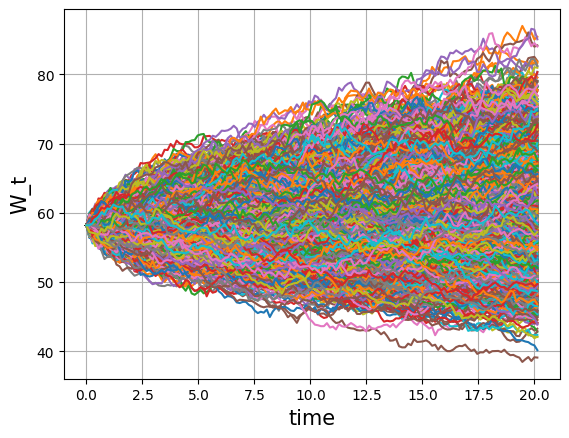

In [ ]:
y=BrownianG(5000,20,150 ,sigma_GB,mu_GB,58.2,GB=True)
Brownianplot(y,20)

In [ ]:
# Get the closing price values corresponding to the last day of the next 20-day period
BM=pd.DataFrame(y.T)
print(BM)
HASU_closing_prices_last_day = BM.loc[150]

          0          1          2          3          4          5     \
0    58.200000  58.200000  58.200000  58.200000  58.200000  58.200000   
1    58.460076  58.053808  58.656081  58.476236  58.548468  58.093831   
2    58.140820  57.371036  58.656387  58.621735  59.171612  58.978857   
3    57.698693  57.017398  58.062312  57.780159  59.176810  58.671982   
4    58.769371  56.354546  58.252987  58.608937  58.425976  58.441715   
..         ...        ...        ...        ...        ...        ...   
146  57.949956  63.909654  61.081583  59.559784  53.412972  65.251593   
147  56.674640  64.565520  60.662914  60.340563  53.247670  64.450373   
148  56.282008  64.563503  60.561201  60.961660  52.840457  64.595690   
149  55.549703  64.017895  61.301249  60.966311  52.100538  64.741958   
150  55.500973  63.628708  61.529836  61.023626  51.858922  65.305707   

          6          7          8          9     ...       4990       4991  \
0    58.200000  58.200000  58.200000  58.2000

In [ ]:
BM.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,...,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000,58.200000
1,58.460076,58.053808,58.656081,58.476236,58.548468,58.093831,56.937705,58.587519,58.354223,57.882174,...,58.948823,57.686609,58.330125,58.262583,57.771526,58.413213,58.463020,58.458630,57.224688,58.202635
2,58.140820,57.371036,58.656387,58.621735,59.171612,58.978857,57.282656,58.082587,58.679285,57.994247,...,58.817625,58.048628,58.485379,59.121828,58.035714,57.751560,57.928773,58.122729,57.111746,58.458174
3,57.698693,57.017398,58.062312,57.780159,59.176810,58.671982,57.057047,57.990372,59.085559,58.124144,...,58.687750,58.938305,58.717181,59.497756,57.834028,57.685679,57.643534,58.155451,57.034497,59.084097
4,58.769371,56.354546,58.252987,58.608937,58.425976,58.441715,56.582294,57.638284,59.560579,58.853489,...,58.949283,58.406024,58.343260,59.906217,58.599423,57.487713,57.103183,58.004570,56.844754,59.439151


### Part g

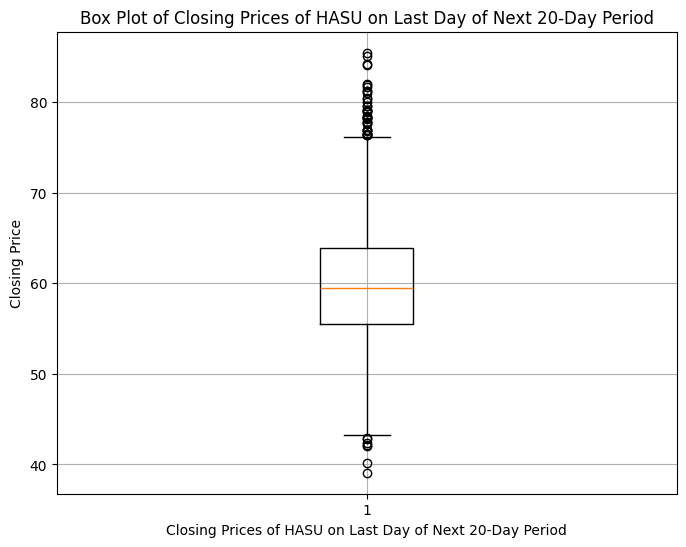

In [ ]:
# Draw a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(HASU_closing_prices_last_day)
plt.xlabel('Closing Prices of HASU on Last Day of Next 20-Day Period')
plt.ylabel('Closing Price')
plt.title('Box Plot of Closing Prices of HASU on Last Day of Next 20-Day Period')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = np.percentile(HASU_closing_prices_last_day, 25)
Q3 = np.percentile(HASU_closing_prices_last_day, 75)
Median =np.percentile(HASU_closing_prices_last_day, 50)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Print the IQR range
print(f'Q1 (25th percentile): {Q1}')
print(f'Q3 (75th percentile): {Q3}')
print(f'IQR (Interquartile Range): {IQR}')
print(f'Median: {Median}')

Q1 (25th percentile): 55.504520195386945
Q3 (75th percentile): 63.839393406866904
IQR (Interquartile Range): 8.334873211479959
Median: 59.506507109731274


### Part h

In [ ]:
endingValueGBM=BM.loc[150]
print(endingValueGBM.describe())
print('Probability :',len(endingValueGBM[(endingValueGBM>55)&(endingValueGBM<60)])/len(endingValueGBM))

count    5000.000000
mean       59.878568
std         6.238190
min        39.089019
25%        55.504520
50%        59.506507
75%        63.839393
max        85.434798
Name: 150, dtype: float64
Probability : 0.3082


### Part i

In [ ]:
#95% prediction interval for ending values
np.percentile(endingValueGBM,[2.5,97.5])

array([48.75365056, 73.18980376])